In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('D:/Machine_learning/supervised/bank.csv')

In [4]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [5]:
#info of the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [6]:
df['deposit'].value_counts()

no     5873
yes    5289
Name: deposit, dtype: int64

In [7]:
df['deposit'] = np.where(df['deposit']=='no', 0, 1)

In [8]:
df['deposit'].value_counts()

0    5873
1    5289
Name: deposit, dtype: int64

In [9]:
#Depedent and Independent variables
X = df.drop('deposit', axis=1)
y = df['deposit']

In [10]:
y.mean()

0.4738398136534671

In [11]:
#numerical and categorical variables in independent variables
num = X.select_dtypes(include='number')
cat = X.select_dtypes(include='object')

In [12]:
#Function definition for getting unique values in numerical variables
def unique_values(feature):
    value = feature.value_counts().count()
    return value
num_unique = pd.DataFrame(num.apply(lambda x:unique_values(x)))
num_unique

,0
age,76
balance,3805
day,31
duration,1428
campaign,36
pdays,472
previous,34


In [13]:
cat_unique = pd.DataFrame(cat.apply(lambda x:unique_values(x)))
cat_unique

,0
job,12
marital,3
education,4
default,2
housing,2
loan,2
contact,3
month,12
poutcome,4


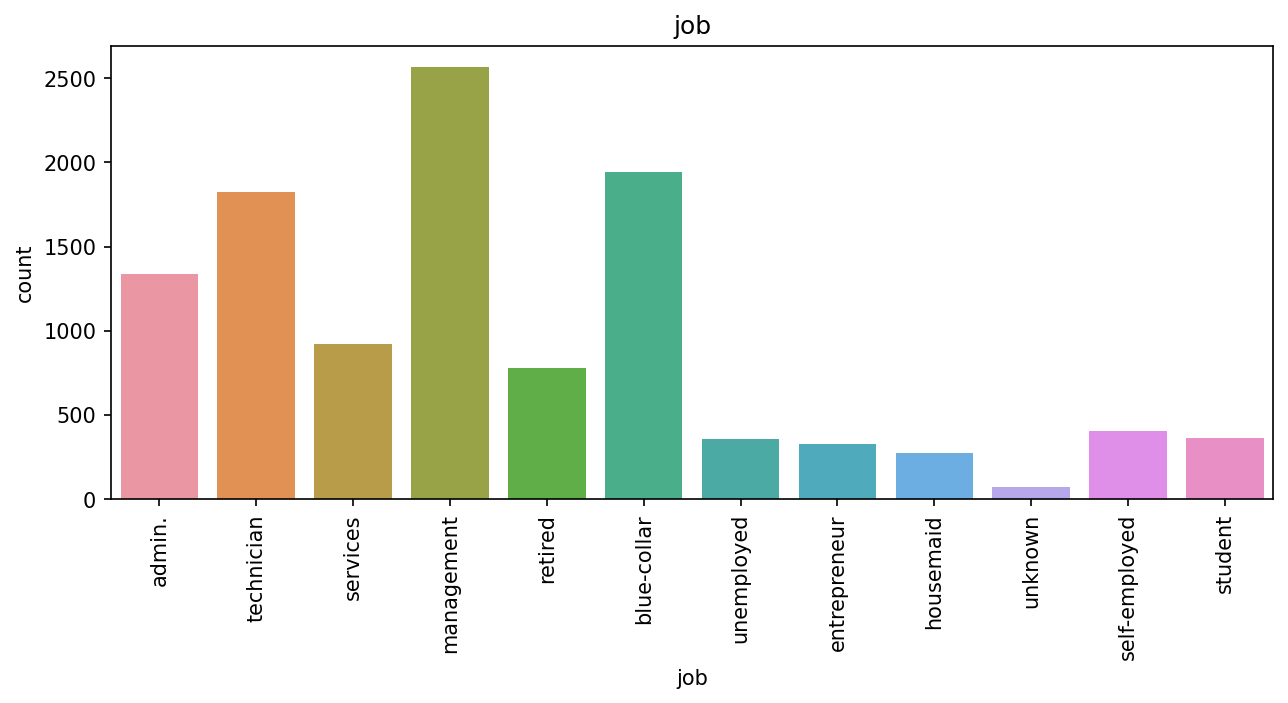

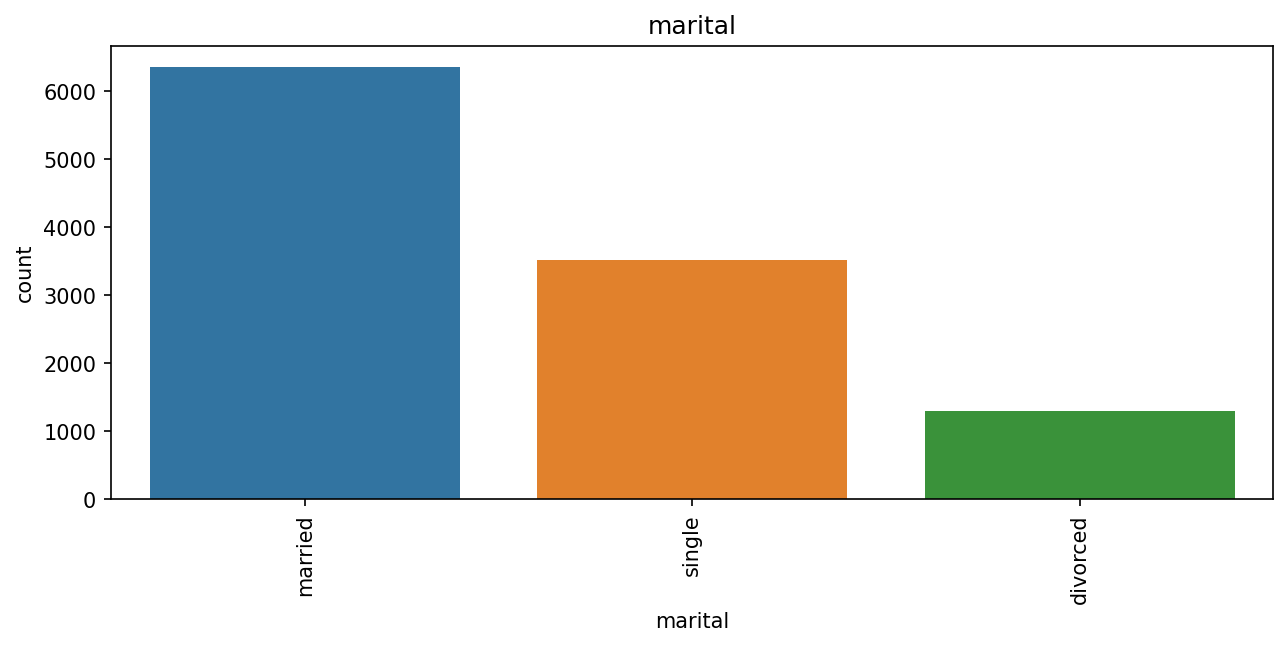

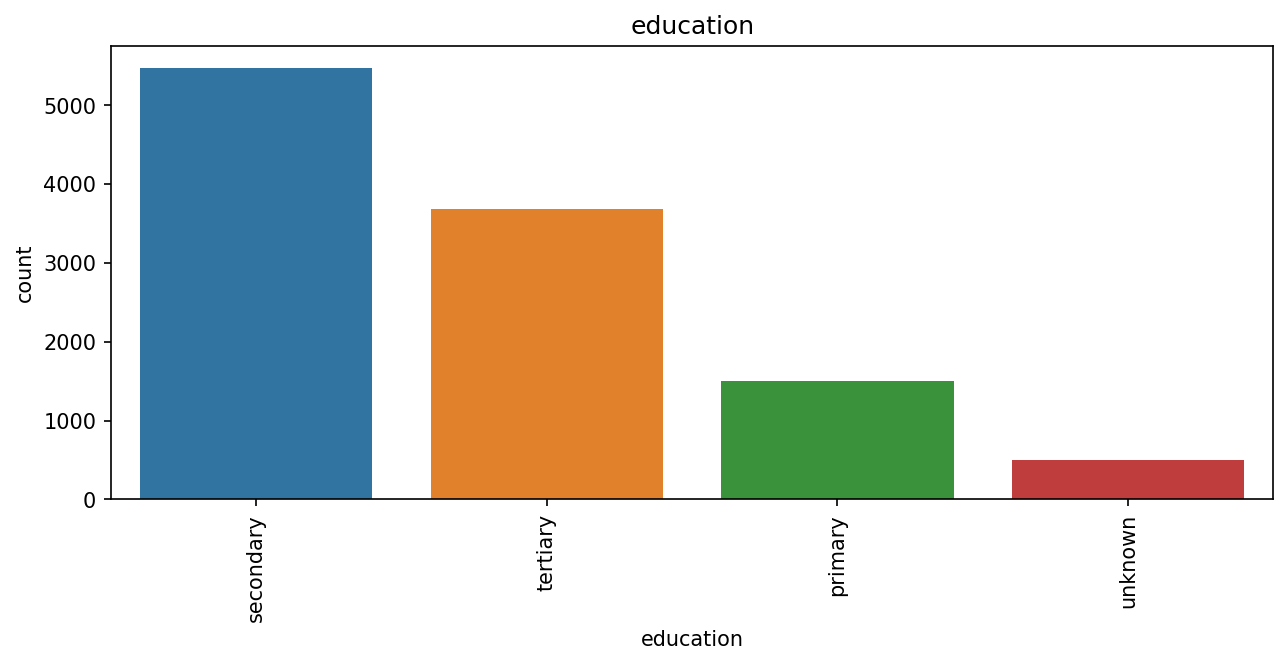

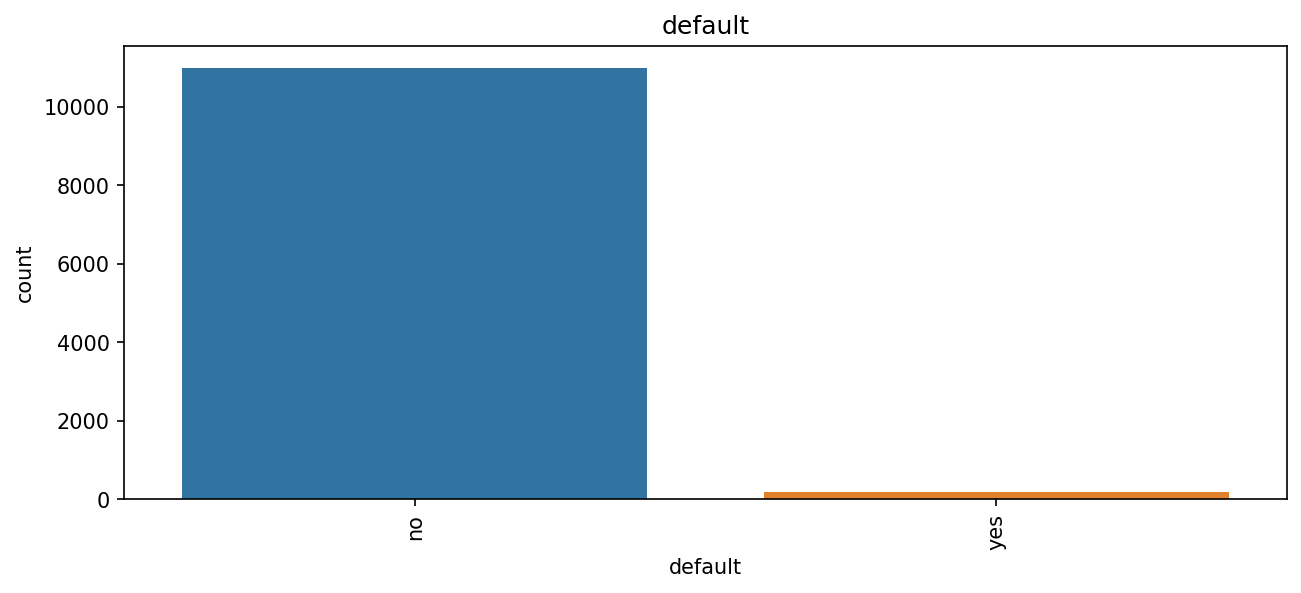

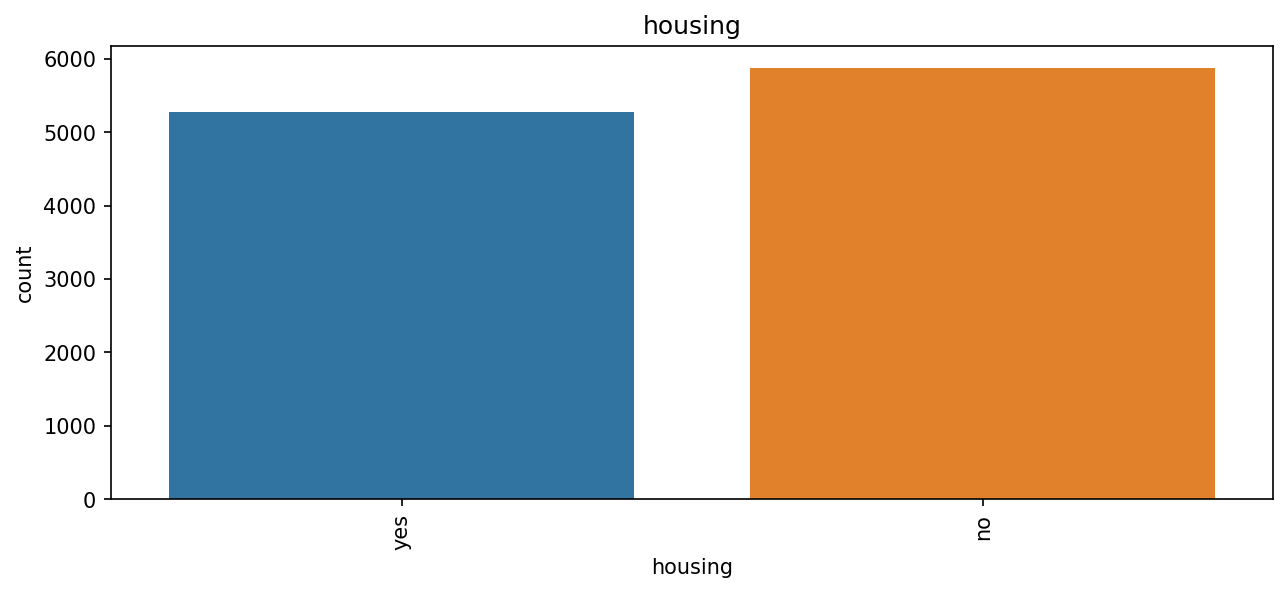

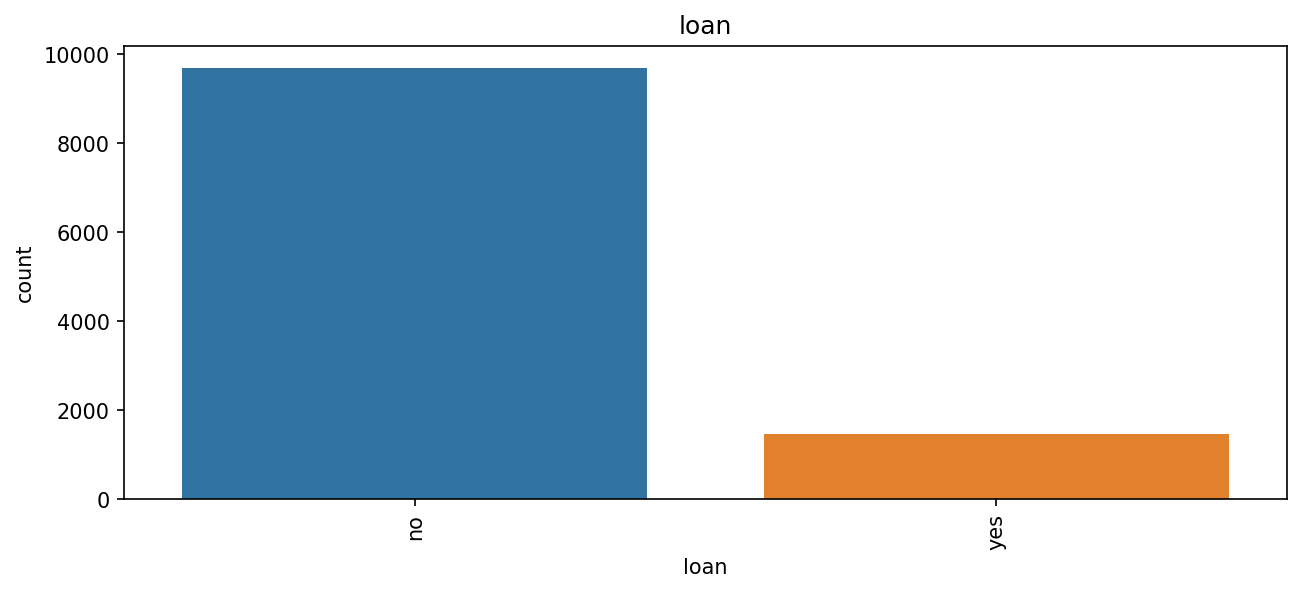

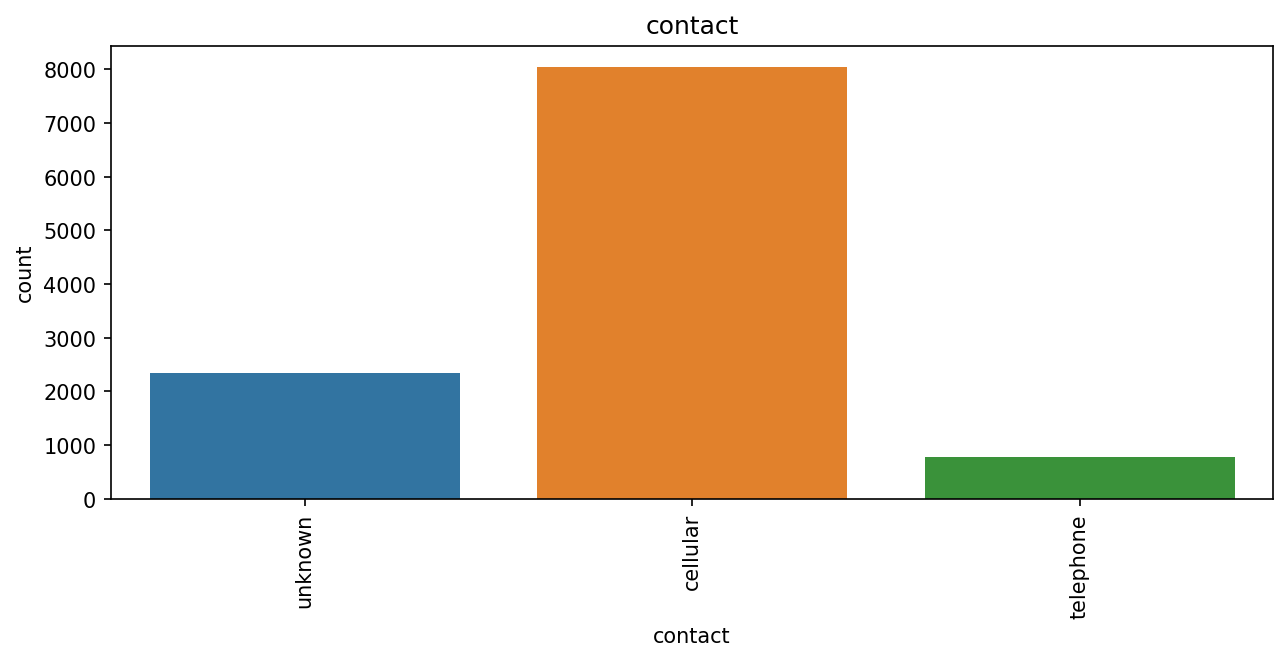

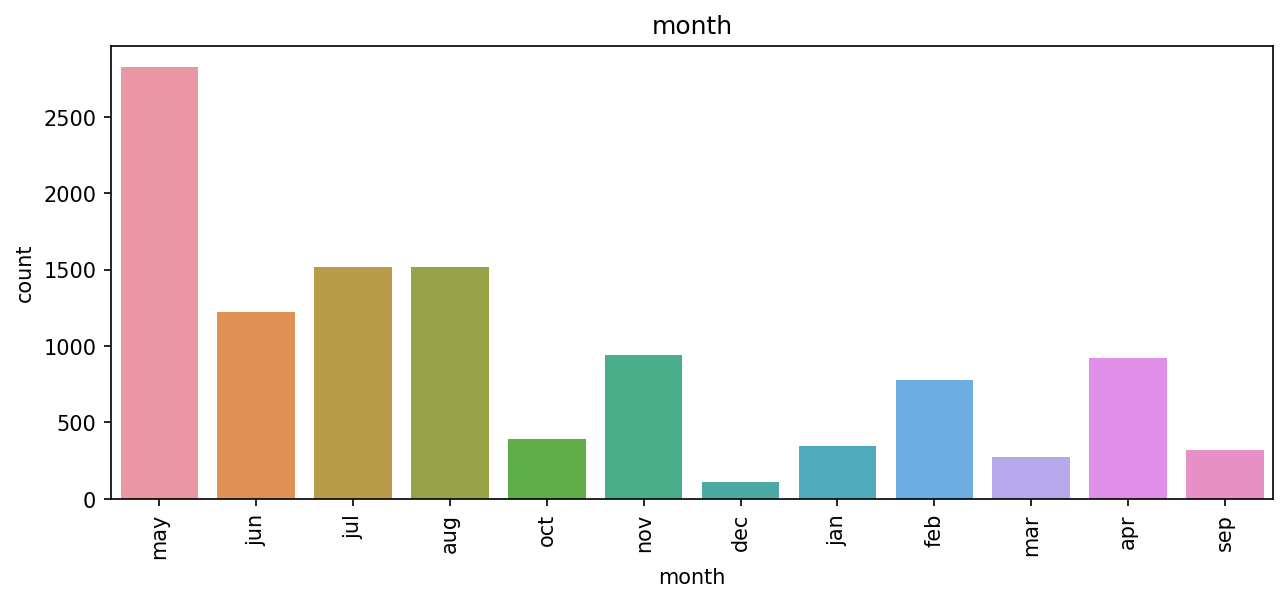

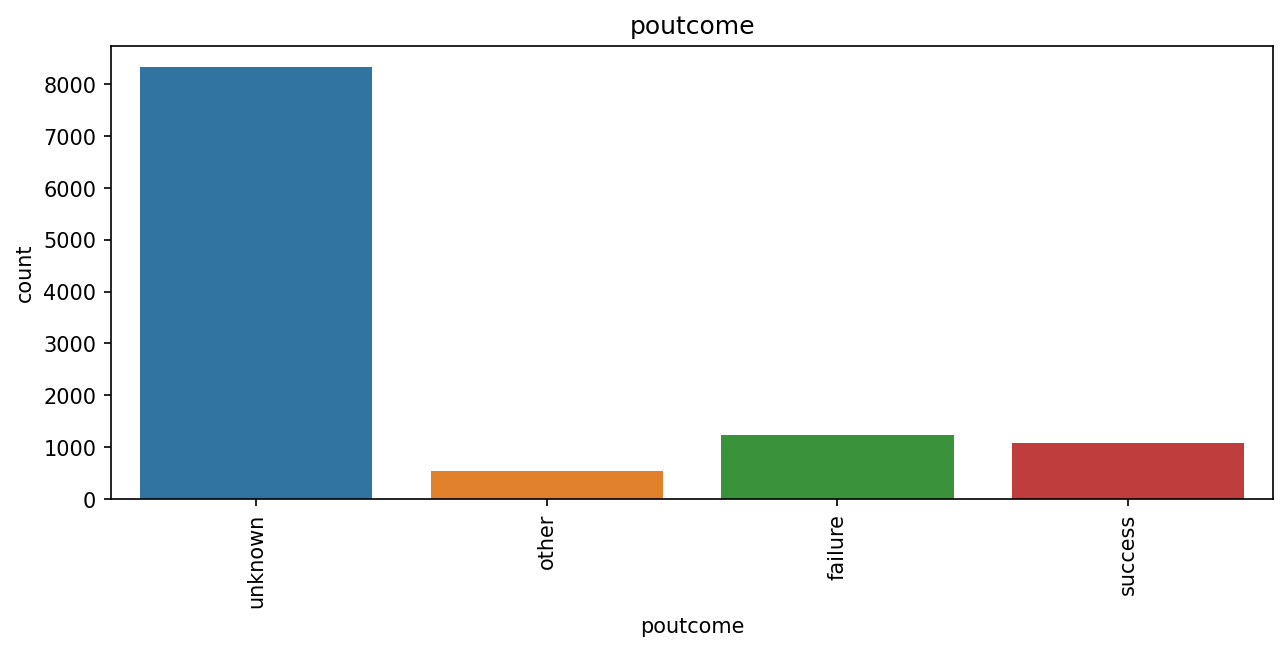

In [347]:
for col in cat.columns:
    plt.figure(figsize=(10,4), dpi=150)
    plt.title(col)
    sns.countplot(x=col, data=cat)
    plt.xticks(rotation=90)
    plt.show()

In [14]:
X['job'] = np.where(X['job']=='unknown', 'others', X['job'])
X['marital'] = np.where(X['marital']=='divorced', 'single', X['marital'])
X['education'] = np.where(X['education']=='unknown', 'others', X['education'])
X['contact'] = np.where(X['contact']=='unknown', 'others', X['contact'])
X['poutcome'] = np.where(X['poutcome']=='unknown', 'other', X['poutcome'])

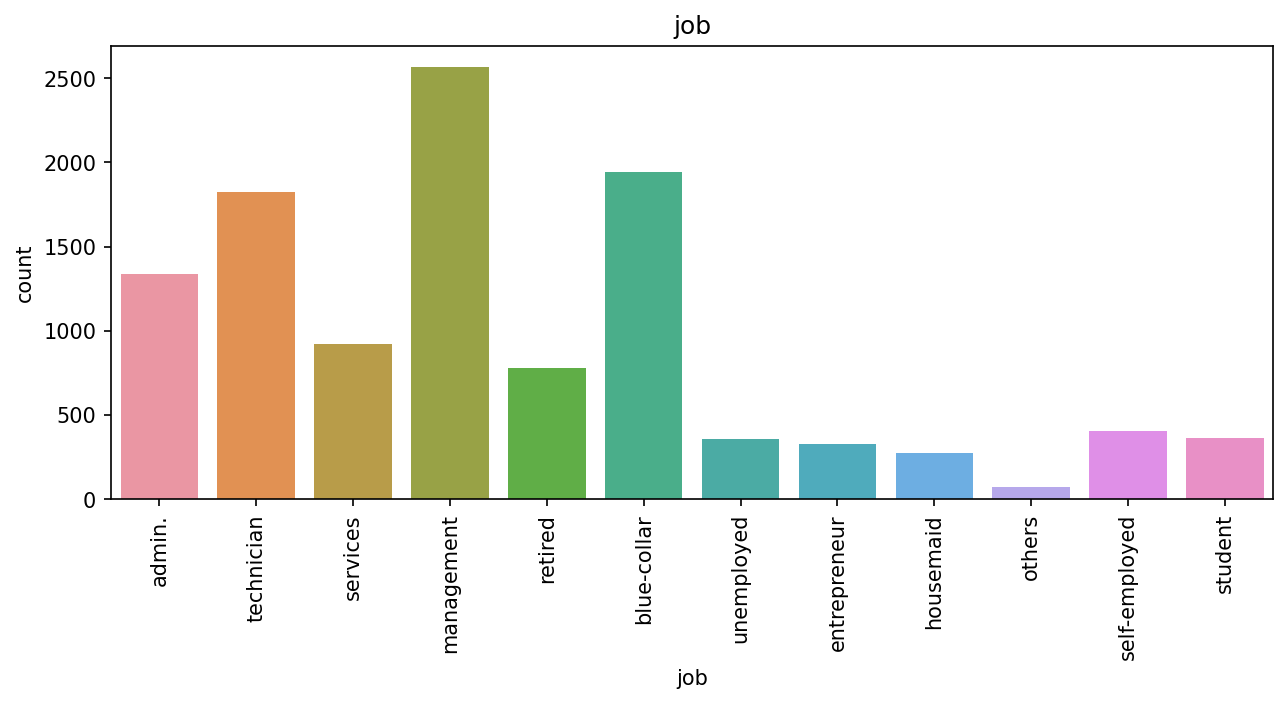

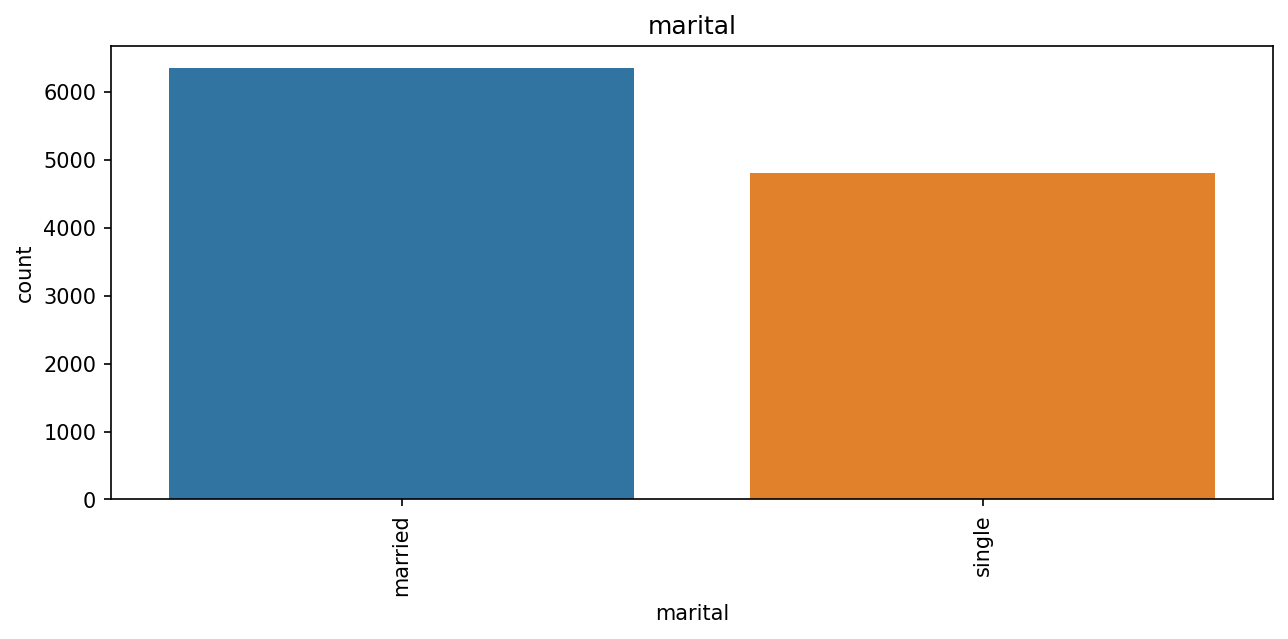

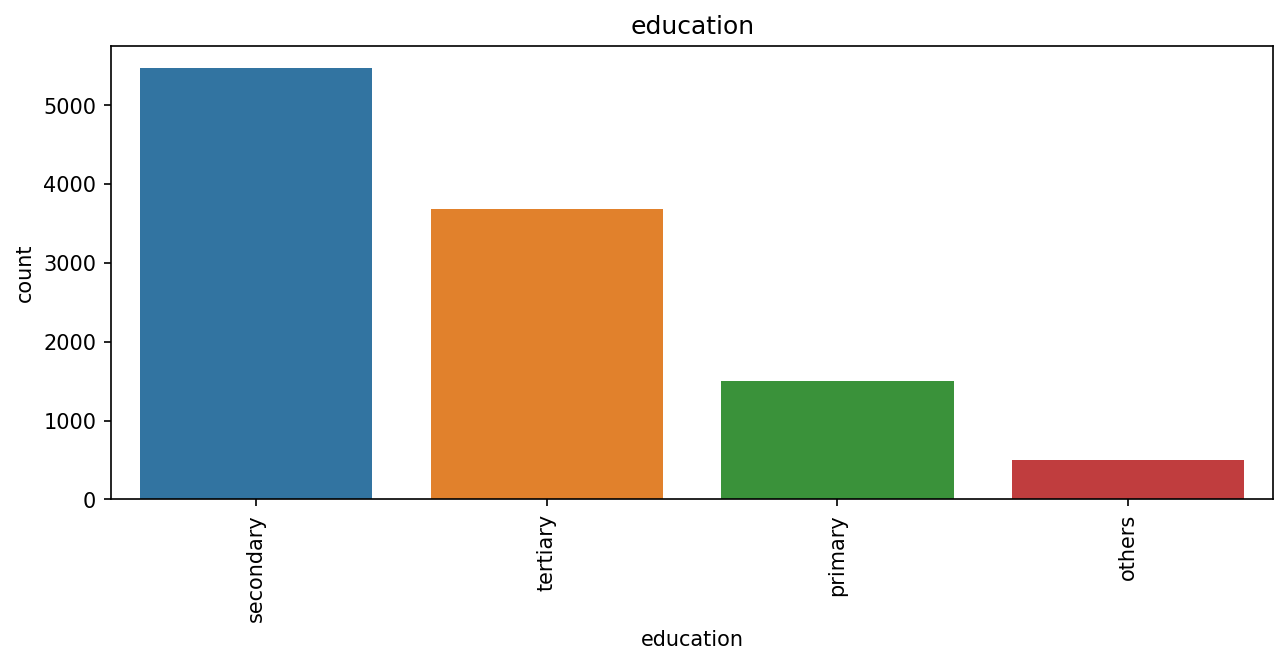

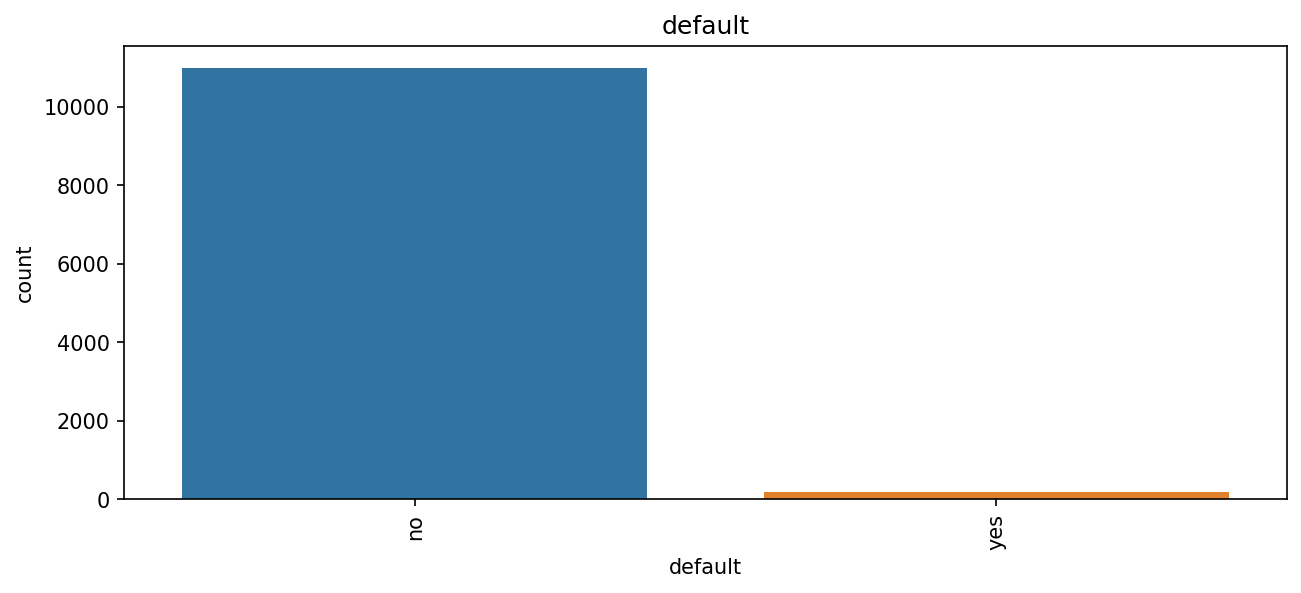

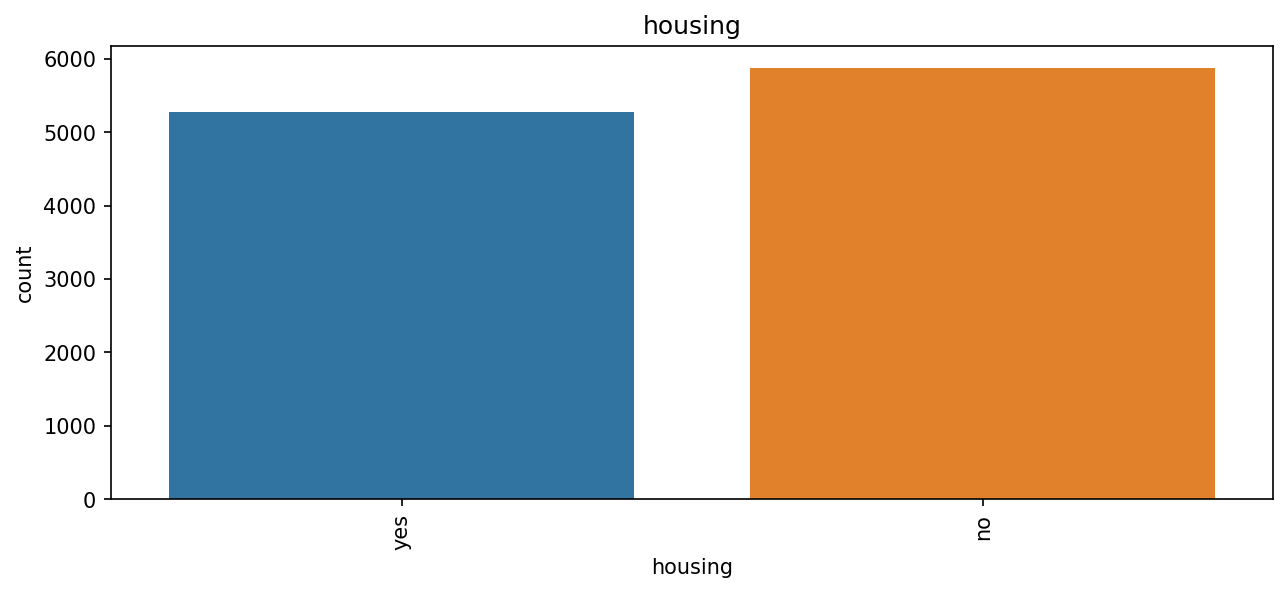

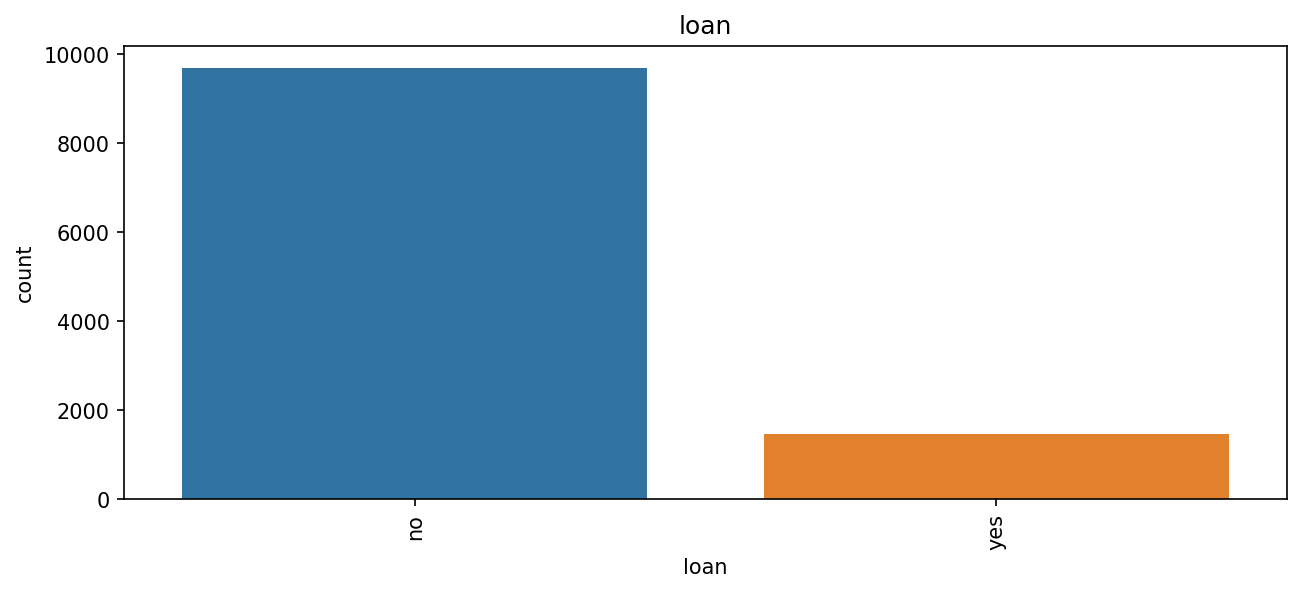

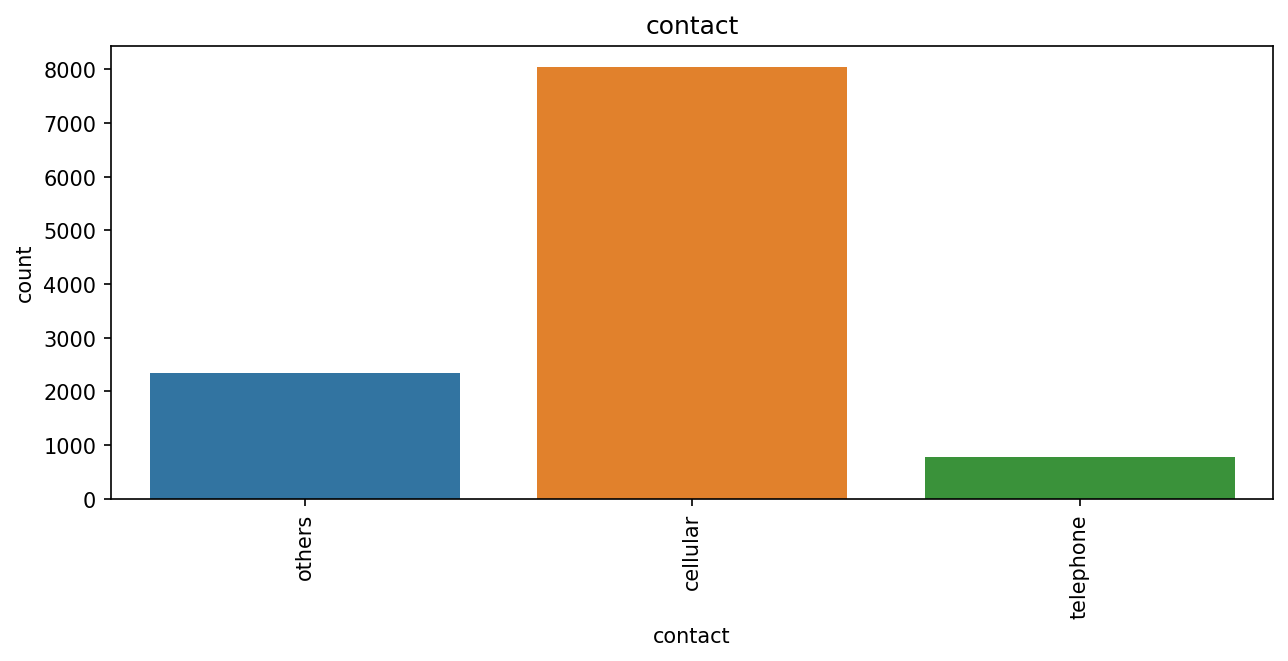

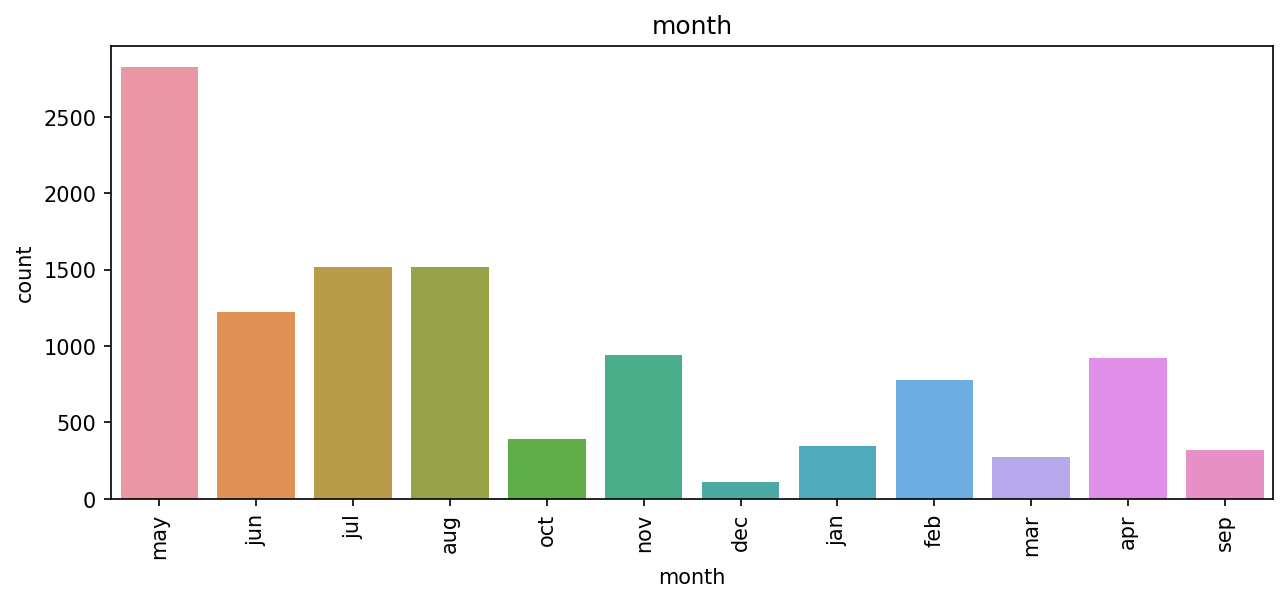

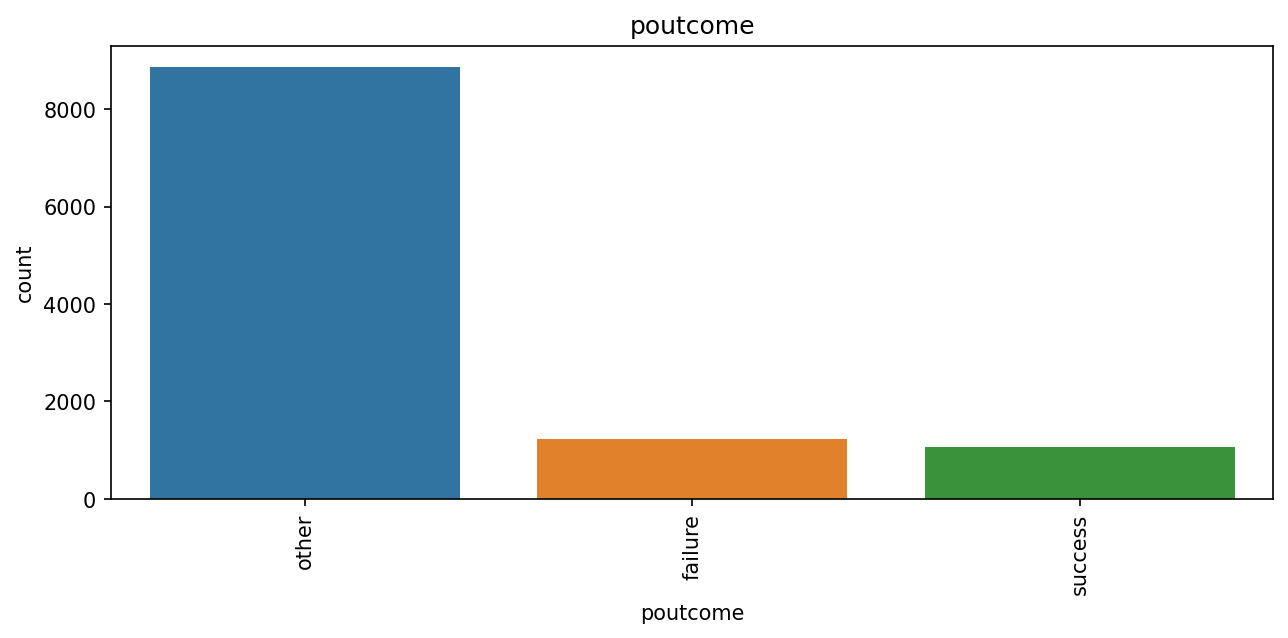

In [15]:
cat = X.select_dtypes(include='object')
for col in cat.columns:
    plt.figure(figsize=(10,4), dpi=150)
    plt.title(col)
    sns.countplot(x=col, data=cat)
    plt.xticks(rotation=90)
    plt.show()

In [16]:
#outlier analysis of numerical features
#5 number summary
num.describe(percentiles=[0.01,0.025,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.95,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
1%,22.000000,-522.000000,1.000000,14.000000,1.000000,-1.000000,0.000000
2.5%,24.000000,-305.900000,2.000000,29.000000,1.000000,-1.000000,0.000000
5%,26.000000,-54.950000,3.000000,51.000000,1.000000,-1.000000,0.000000
10%,28.000000,0.000000,4.000000,77.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000


In [17]:
def outlier_cap(x):
    x = x.clip(lower=x.quantile(0.05))
    x = x.clip(upper=x.quantile(0.95))
    return x

In [18]:
#removing 5% outliers for every features
num = num.apply(lambda x:outlier_cap(x))

In [19]:
num.describe(percentiles=[0.01,0.025,0.05,0.10,0.25,0.50,0.75,0.85,0.88,0.9,0.975,0.99])

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,40.840262,1268.026563,15.697276,356.583596,2.292421,47.831571,0.667354
std,10.537079,1667.259598,8.315664,289.582528,1.664320,95.871706,1.371105
min,26.000000,-54.950000,3.000000,51.000000,1.000000,-1.000000,0.000000
1%,26.000000,-54.950000,3.000000,51.000000,1.000000,-1.000000,0.000000
2.5%,26.000000,-54.950000,3.000000,51.000000,1.000000,-1.000000,0.000000
5%,26.000000,-54.902500,3.000000,51.000000,1.000000,-1.000000,0.000000
10%,28.000000,0.000000,4.000000,77.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000


In [20]:
num_unique = pd.DataFrame(num.apply(lambda x:unique_values(x)))
num_unique

,0
age,36
balance,2971
day,28
duration,1000
campaign,7
pdays,302
previous,6


In [21]:
#checking for missing values
num.isna().sum()

age         0
balance     0
day         0
duration    0
campaign    0
pdays       0
previous    0
dtype: int64

In [22]:
cat.isna().sum()

job          0
marital      0
education    0
default      0
housing      0
loan         0
contact      0
month        0
poutcome     0
dtype: int64

In [23]:
#Feature selection
# removing columns with zero variance
from sklearn.feature_selection import VarianceThreshold
var = VarianceThreshold(threshold=0)
var.fit_transform(num)
cols = var.get_support(indices=True)
num = num.iloc[:, cols]

In [24]:
num.iloc[0]

age           59.0
balance     2343.0
day            5.0
duration    1042.0
campaign       1.0
pdays         -1.0
previous       0.0
Name: 0, dtype: float64

In [25]:
num.corr()

,age,balance,day,duration,campaign,pdays,previous
age,1.000000,0.124434,-0.000512,-0.004433,0.010021,-0.000505,0.024055
balance,0.124434,1.000000,0.016460,0.040749,-0.028405,0.029189,0.055464
day,-0.000512,0.016460,1.000000,-0.024610,0.132320,-0.084005,-0.071330
duration,-0.004433,0.040749,-0.024610,1.000000,-0.023140,-0.019216,-0.028614
campaign,0.010021,-0.028405,0.132320,-0.023140,1.000000,-0.112027,-0.085525
pdays,-0.000505,0.029189,-0.084005,-0.019216,-0.112027,1.000000,0.695293
previous,0.024055,0.055464,-0.071330,-0.028614,-0.085525,0.695293,1.000000


In [26]:
from sklearn.preprocessing import KBinsDiscretizer
discrete=KBinsDiscretizer(n_bins=10,encode='ordinal', strategy='quantile')
num_binned=pd.DataFrame(discrete.fit_transform(num),index=num.index, columns=num.columns).add_suffix('_Rank')
num_binned.head()

,age_Rank,balance_Rank,day_Rank,duration_Rank,campaign_Rank,pdays_Rank,previous_Rank
0,9.0,8.0,1.0,9.0,0.0,0.0,0.0
1,8.0,1.0,1.0,9.0,0.0,0.0,0.0
2,5.0,6.0,1.0,9.0,0.0,0.0,0.0
3,8.0,8.0,1.0,7.0,0.0,0.0,0.0
4,8.0,2.0,1.0,8.0,1.0,0.0,0.0


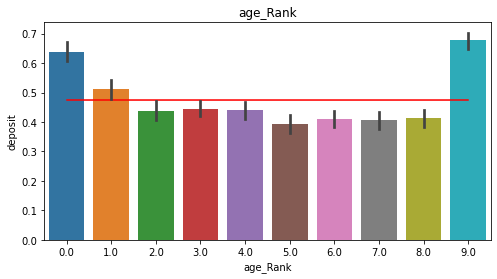

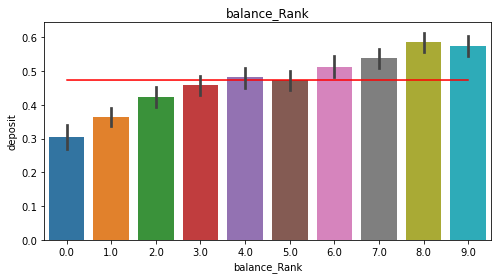

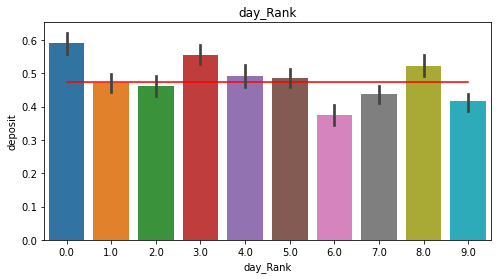

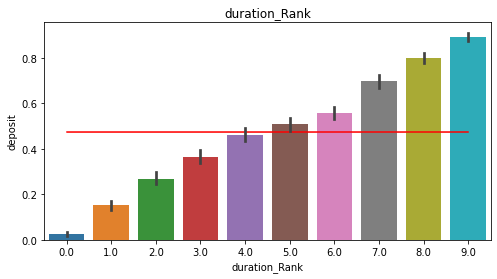

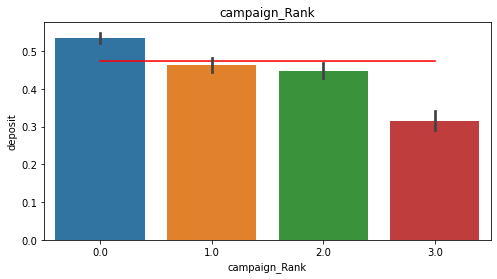

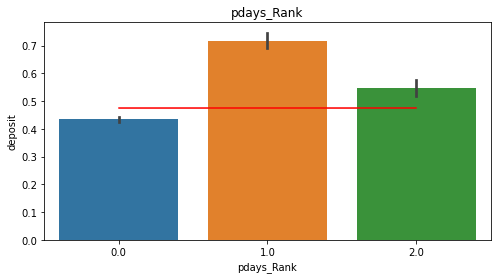

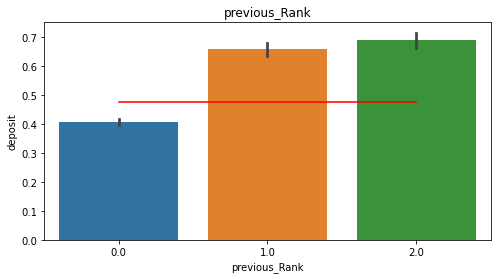

In [27]:
X_bin_combined=pd.concat([y,num_binned],axis=1,join='inner')
from numpy import mean
for col in (num_binned.columns):
    plt.figure(figsize=(8,4))
    plt.title(col)
    sns.lineplot(x=col,y=y.mean(),data=X_bin_combined,color='red')
    sns.barplot(x=col, y="deposit",data=X_bin_combined, estimator=mean)
plt.show()

In [28]:
num = num.drop(['day', 'pdays'], axis=1)

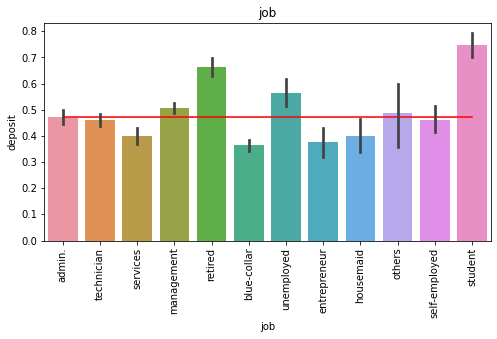

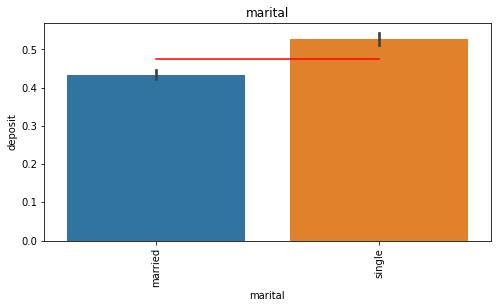

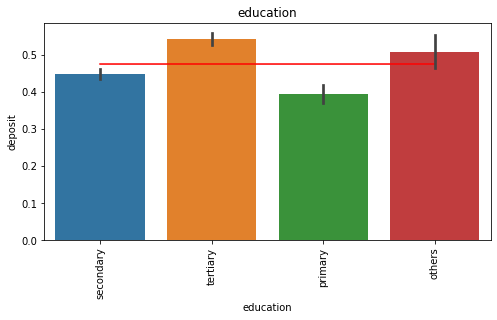

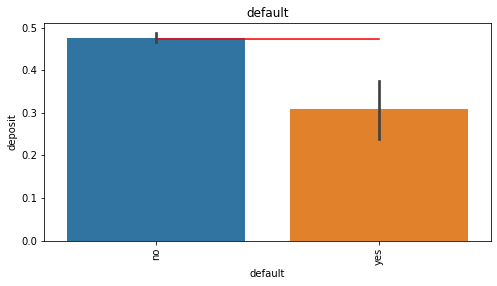

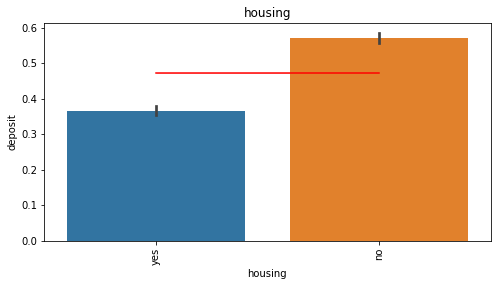

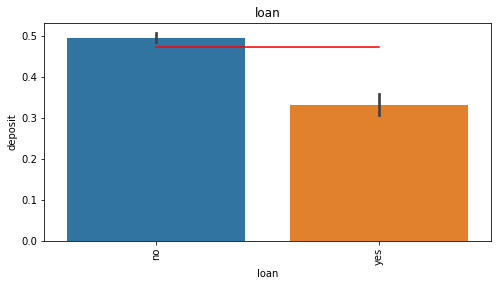

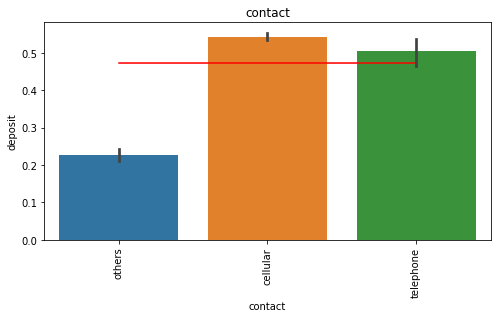

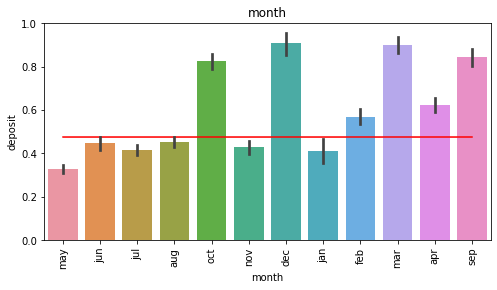

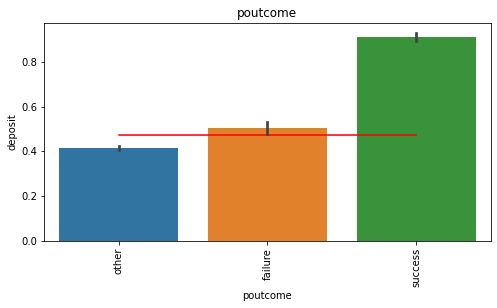

In [29]:
X_char_merged=pd.concat([y,cat],axis=1,join='inner')
for col in cat.columns:
    plt.figure(figsize=(8,4))
    plt.title(col)
    sns.lineplot(x=col,y=y.mean(),data=X_char_merged,color='red')
    sns.barplot(x=col, y="deposit",data=X_char_merged, estimator=mean)
    plt.xticks(rotation=90)
plt.show()

In [30]:
cat = cat.drop(['job','education', 'month'], axis=1)

In [31]:
X_char_dum = pd.get_dummies(cat, drop_first = True)
X_char_dum.shape

(11162, 8)

In [32]:
X = pd.concat([num,X_char_dum],axis=1,join="inner")

In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   age                11162 non-null  int64  
 1   balance            11162 non-null  float64
 2   duration           11162 non-null  float64
 3   campaign           11162 non-null  int64  
 4   previous           11162 non-null  int64  
 5   marital_single     11162 non-null  uint8  
 6   default_yes        11162 non-null  uint8  
 7   housing_yes        11162 non-null  uint8  
 8   loan_yes           11162 non-null  uint8  
 9   contact_others     11162 non-null  uint8  
 10  contact_telephone  11162 non-null  uint8  
 11  poutcome_other     11162 non-null  uint8  
 12  poutcome_success   11162 non-null  uint8  
dtypes: float64(2), int64(3), uint8(8)
memory usage: 523.3 KB


In [34]:
X.head()

,age,balance,duration,campaign,previous,marital_single,default_yes,housing_yes,loan_yes,contact_others,contact_telephone,poutcome_other,poutcome_success
0,59,2343.0,1042.0,1,0,0,0,1,0,1,0,1,0
1,56,45.0,1079.9,1,0,0,0,0,0,1,0,1,0
2,41,1270.0,1079.9,1,0,0,0,1,0,1,0,1,0
3,55,2476.0,579.0,1,0,0,0,1,0,1,0,1,0
4,54,184.0,673.0,2,0,0,0,0,0,1,0,1,0


In [35]:
from sklearn.model_selection import train_test_split

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [37]:
from sklearn.model_selection import GridSearchCV

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [39]:
model = DecisionTreeClassifier(criterion='gini')

In [76]:
param_grid = {'max_depth':[5,7,9], 'min_samples_split':[15,25,50,75], 'min_samples_leaf':[90,95,100]}

In [77]:
grid = GridSearchCV(model, param_grid, scoring='accuracy', cv=10, verbose=1)

In [78]:
grid.fit(X_train, y_train)

Fitting 10 folds for each of 36 candidates, totalling 360 fits


GridSearchCV(cv=10,
             estimator=DecisionTreeClassifier(max_depth=9, min_samples_leaf=100,
                                              min_samples_split=15),
             param_grid={'max_depth': [5, 7, 9],
                         'min_samples_leaf': [90, 95, 100],
                         'min_samples_split': [15, 25, 50, 75]},
             scoring='accuracy', verbose=1)

In [79]:
from sklearn.metrics import plot_confusion_matrix, classification_report, plot_roc_curve

In [80]:
grid.best_estimator_.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 9,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 100,
 'min_samples_split': 15,
 'min_weight_fraction_leaf': 0.0,
 'random_state': None,
 'splitter': 'best'}

In [81]:
model.set_params(max_depth=9, min_samples_leaf=100, min_samples_split=15)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100, min_samples_split=15)

In [82]:
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=100, min_samples_split=15)

In [83]:
pred = grid.predict(X_test)

In [84]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83      1181
           1       0.82      0.78      0.80      1052

    accuracy                           0.81      2233
   macro avg       0.82      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233



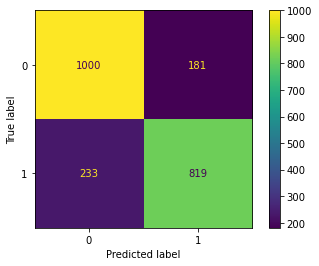

In [85]:
plot_confusion_matrix(grid, X_test, y_test)

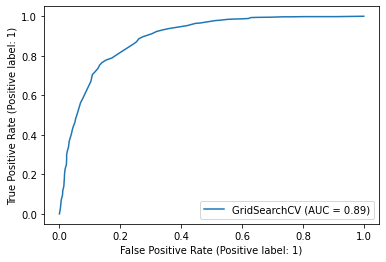

In [86]:
plot_roc_curve(grid, X_test, y_test)

In [87]:
from sklearn import tree

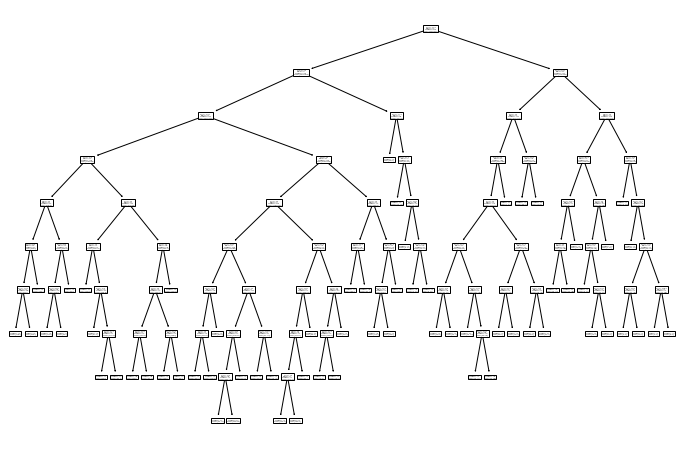

In [88]:
plt.figure(figsize=(12,8))
tree.plot_tree(model);

In [89]:
from joblib import dump, load

In [91]:
dump(model, r'C:\Users\mukesh\Desktop\machine learning\projects\Employee_attrition\model.pkl')

['C:\\Users\\mukesh\\Desktop\\machine learning\\projects\\Employee_attrition\\model.pkl']

In [92]:
pip list

Note: you may need to restart the kernel to use updated packages.Package                            Version
---------------------------------- -------------------
absl-py                            0.12.0
alabaster                          0.7.12
anaconda-client                    1.7.2
anaconda-navigator                 1.10.0
anaconda-project                   0.8.3
apyori                             1.1.2
argh                               0.26.2
argon2-cffi                        20.1.0
asgiref                            3.4.1
asn1crypto                         1.4.0
astroid                            2.4.2
astropy                            4.0.2
astunparse                         1.6.3
async-generator                    1.10
atari-py                           0.2.6
atomicwrites                       1.4.0
attrs                              20.3.0
autopep8                           1.5.4
Babel                              2.8.1
backcall                           0.2.0
backports.fu

You should consider upgrading via the 'C:\Users\mukesh\anaconda3\anacondadatascience\python.exe -m pip install --upgrade pip' command.



fastcache                          1.1.0
filelock                           3.0.12
findspark                          1.4.2
flake8                             3.8.4
Flask                              1.1.2
Flask-SQLAlchemy                   2.5.1
flatbuffers                        1.12
fsspec                             0.8.3
future                             0.18.2
gast                               0.4.0
gevent                             20.9.0
glob2                              0.7
google-auth                        1.30.1
google-auth-oauthlib               0.4.4
google-pasta                       0.2.0
greenlet                           0.4.17
grpcio                             1.34.1
gym                                0.19.0
h5py                               3.1.0
HeapDict                           1.0.1
html5lib                           1.1
idna                               2.10
imageio                            2.9.0
imagesize                          1.2.0
imbalanced-lea

In [99]:
model.predict([[5.600e+01, 1.866e+03, 7.600e+02, 1.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00, 0.000e+00, 1.000e+00, 0.000e+00, 0.000e+00, 1.000e+00,
       0.000e+00]])

array([1])